In [1]:
import pandas as pd
import pyreadstat as pyr

import seaborn as sns
import matplotlib.pyplot as plt



In [8]:
def wrangle(filename):
    df, meta = pyr.read_sav(filename)
    df = df[['RESPNO','COUNTRY', 'URBRUR', 'REGION', 'Q3', 'Q4A', 'Q6', 'Q40', 'Q43G', 'Q49T']]
    list = ['COUNTRY', 'URBRUR', 'REGION', 'Q3', 'Q4A', 'Q6', 'Q40', 'Q43G', 'Q49T']
    for i in list:
        x = meta.variable_value_labels[i]
        df[i].replace(x, inplace=True)
        
    df.columns = ['id', 'country', 'community', 'state', 'ctry_direction', 'ctry_present_econ',
              'rel_econ_past12m', 'fear_pol_intimidation', 'trust_police', 'pay_bribe_police']

    # Changes index to id
    df.set_index('id', inplace=True)
    
    return df

In [11]:
df = wrangle('afrobarometer.sav')

In [12]:
df.head()

,country,community,state,ctry_direction,ctry_present_econ,rel_econ_past12m,fear_pol_intimidation,trust_police,pay_bribe_police
id,,,,,,,,,
BEN0001,Benin,Rural,Mono,Going in the right direction,Fairly Bad,Much worse,A little bit,A lot,No contact
BEN0002,Benin,Rural,Mono,Going in the wrong direction,Fairly Good,Worse,Not at all,Somewhat,No contact
BEN0003,Benin,Urban,Atlantique,Going in the right direction,Fairly Good,Much worse,A little bit,Just a little,No contact
BEN0004,Benin,Urban,Atlantique,Going in the right direction,Very Bad,Worse,Not at all,A lot,No contact
BEN0005,Benin,Urban,Atlantique,Going in the wrong direction,Very Bad,Much worse,A lot,Just a little,No contact


In [ ]:
print(meta.column_names_to_labels)
meta.variable_value_labels

In [3]:
mask = df['country'] == 'Nigeria'
df_nigeria = df[mask]

df_nigeria.head()

,country,community,state,ctry_direction,ctry_present_econ,rel_econ_past12m,fear_pol_intimidation,trust_police,pay_bribe_police
id,,,,,,,,,
NIG0001,Nigeria,Rural,Bauchi,Going in the wrong direction,Very good,Better,A little bit,Just a little,Once or twice
NIG0002,Nigeria,Urban,Anambra,Going in the wrong direction,Fairly Bad,Worse,A little bit,Not at all,Never
NIG0003,Nigeria,Urban,Anambra,Going in the wrong direction,Fairly Bad,Worse,A little bit,A lot,Once or twice
NIG0004,Nigeria,Rural,Jigawa,Going in the wrong direction,Very good,Worse,Not at all,Just a little,No contact
NIG0005,Nigeria,Rural,Niger,Going in the wrong direction,Fairly Bad,Better,A lot,Just a little,No contact


In [14]:
df_piv = (df_nigeria['state']
             .groupby(df_nigeria['ctry_direction'])
             .value_counts()
             .rename('frequency')
             .to_frame()
             .reset_index()
            )

df_piv

,ctry_direction,state,frequency
0,Don't know,Jigawa,3
1,Don't know,Kogi,2
2,Don't know,Bauchi,1
3,Don't know,Enugu,1
4,Don't know,Kano,1
...,...,...,...
73,Going in the wrong direction,Zamfara,13
74,Going in the wrong direction,Taraba,10
75,Going in the wrong direction,Fct Abuja,8
76,Going in the wrong direction,Kebbi,6


In [9]:
df_piv[df_piv['ctry_direction'] == "Going in the wrong direction"]

,ctry_direction,state,frequency
41,Going in the wrong direction,Lagos,0.088757
42,Going in the wrong direction,Rivers,0.059172
43,Going in the wrong direction,Oyo,0.055227
44,Going in the wrong direction,Anambra,0.051282
45,Going in the wrong direction,Enugu,0.046351
46,Going in the wrong direction,Imo,0.044379
47,Going in the wrong direction,Delta,0.041420
48,Going in the wrong direction,Abia,0.038462
49,Going in the wrong direction,Ogun,0.035503
50,Going in the wrong direction,Osun,0.035503


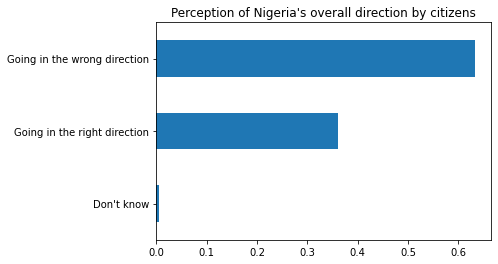

In [58]:
df_nigeria['ctry_direction'].value_counts(normalize=True).sort_values().plot(kind='barh',
                                                                            title= "Perception of Nigeria's overall direction by citizens");

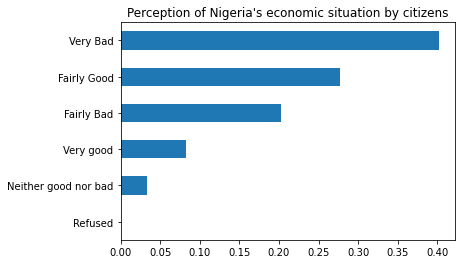

In [60]:
df_nigeria['ctry_present_econ'].value_counts(normalize=True).sort_values().plot(kind='barh',
                                                                            title= "Perception of Nigeria's economic situation by citizens");

In [163]:
df_nigeria['rel_econ_past12m'].value_counts(normalize=True).sort_values()

Refused        0.000625
Don’t know     0.001250
Much better    0.054375
Much worse     0.156875
Same           0.164375
Better         0.294375
Worse          0.328125
Name: rel_econ_past12m, dtype: float64

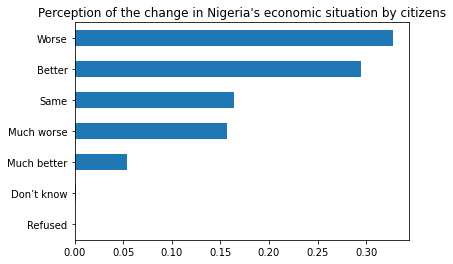

In [61]:
df_nigeria['rel_econ_past12m'].value_counts(normalize=True).sort_values().plot(kind='barh',
                                                                            title= "Perception of the change in Nigeria's economic situation by citizens");

In [46]:
df_nigeria['fear_pol_intimidation'].value_counts()

Not at all      578
A little bit    480
A lot           282
Somewhat        256
Refused           2
Don’t know        2
Name: fear_pol_intimidation, dtype: int64

In [47]:
df_nigeria['trust_police'].value_counts()

Not at all                         765
Just a little                      399
Somewhat                           272
A lot                              151
Don’t know/Haven’t heard enough     11
Refused                              2
Name: trust_police, dtype: int64

In [48]:
df_nigeria['pay_bribe_police'].value_counts()

No contact       867
Never            403
Once or twice    138
A few times      101
Often             91
Name: pay_bribe_police, dtype: int64

In [62]:
df.country.value_counts()

Ghana                    2400
Tanzania                 2400
Mozambique               2392
South Africa             1840
Nigeria                  1600
Kenya                    1599
Cameroon                 1202
Namibia                  1200
Madagascar               1200
Zimbabwe                 1200
Côte d'Ivoire            1200
Cabo Verde               1200
Malawi                   1200
Sierra Leone             1200
Sudan                    1200
Lesotho                  1200
Benin                    1200
Uganda                   1200
Gambia                   1200
Togo                     1200
São Tomé and Príncipe    1200
Burkina Faso             1200
Senegal                  1200
Niger                    1200
Mali                     1200
Liberia                  1200
eSwatini                 1200
Zambia                   1200
Mauritius                1200
Morocco                  1200
Gabon                    1199
Tunisia                  1199
Botswana                 1198
Guinea    

In [63]:
df_nigeria['ctry_direction'].value_counts(normalize=True)

Going in the wrong direction    0.633750
Going in the right direction    0.360625
Don't know                      0.005625
Name: ctry_direction, dtype: float64

In [78]:
pivotal = df_nigeria[['state', 'ctry_direction']].value_counts().to_frame()

In [87]:
pivotal.reset_index(inplace=True)

In [90]:
pivotal_pivot = pivotal.pivot(index='state', columns='ctry_direction')

In [94]:
pivotal_pivot

0                               \
ctry_direction Don't know Going in the right direction   
state                                                    
Abia                  NaN                          1.0   
Adamawa               NaN                          9.0   
Akwa Ibom             NaN                         15.0   
Anambra               NaN                          4.0   
Bauchi                1.0                         25.0   
Bayelsa               NaN                          NaN   
Benue                 NaN                         29.0   
Borno                 NaN                         18.0   
Cross River           NaN                         11.0   
Delta                 NaN                          6.0   
Ebonyi                NaN                          1.0   
Edo                   NaN                         11.0   
Ekiti                 NaN                          7.0   
Enugu                 1.0                          NaN   
Fct Abuja             NaN                          8.0   
Gombe                 NaN                          8.0   
Imo                   NaN                          3.0   
Jigawa                3.0                         32.0   
Kaduna                NaN                         50.0   
Kano                  1.0                         66.0   
Katsina               NaN                         42.0   
Kebbi                 NaN                         26.0   
Kogi                  2.0                          6.0   
Kwara                 NaN                          7.0   
Lagos                 NaN                         38.0   
Nasarawa              NaN                         10.0   
Niger                 NaN                         24.0   
Ogun                  NaN                         12.0   
Ondo                  NaN                          8.0   
Osun                  NaN                          4.0   
Oyo                   NaN                         16.0   
Plateau               1.0                          9.0   
Rivers                NaN                          4.0   
Sokoto                NaN                         24.0   
Taraba                NaN                         14.0   
Yobe                  NaN                         10.0   
Zamfara               NaN                         19.0   

                                             
ctry_direction Going in the wrong direction  
state                                        
Abia                                   39.0  
Adamawa                                23.0  
Akwa Ibom                              33.0  
Anambra                                52.0  
Bauchi                                 22.0  
Bayelsa                                24.0  
Benue                                  19.0  
Borno                                  30.0  
Cross River                            21.0  
Delta                                  42.0  
Ebonyi                                 23.0  
Edo                                    29.0  
Ekiti                                  17.0  
Enugu                                  47.0  
Fct Abuja                               8.0  
Gombe                                  16.0  
Imo                                    45.0  
Jigawa                                 13.0  
Kaduna                                 14.0  
Kano                                   29.0  
Katsina                                14.0  
Kebbi                                   6.0  
Kogi                                   24.0  
Kwara                                  17.0  
Lagos                                  90.0  
Nasarawa                                6.0  
Niger                                  16.0  
Ogun                                   36.0  
Ondo                                   32.0  
Osun                                   36.0  
Oyo                                    56.0  
Plateau                                22.0  
Rivers                                 60.0  
Sokoto                                 16.0  
T

In [112]:
dir_diff_by_state =(pivotal_pivot[0]['Going in the right direction'] - pivotal_pivot[0]['Going in the wrong direction']).to_frame()

In [113]:
dir_diff_by_state.rename(columns={0:'direction_difference'}, inplace=True)

In [117]:
dir_diff_by_state.reset_index(inplace=True)

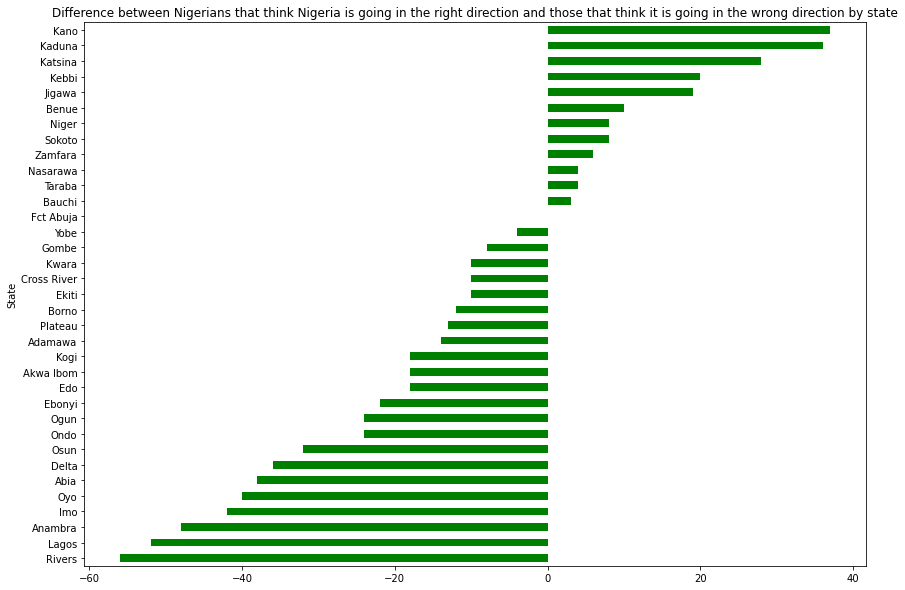

In [161]:
plt.rcParams["figure.figsize"] = (14,10)
ax = dir_diff_by_state.dropna().sort_values(by='direction_difference').plot.barh(y='direction_difference',
                                                                                 x='state', color='green', 
                                                                                 legend=False)
plt.ylabel('State')
plt.title('Difference between Nigerians that think Nigeria is going in the right direction and those that think it is going in the wrong direction by state');


In [143]:
dir_diff_by_state.sort_values(by='direction_difference')

,state,direction_difference
32,Rivers,-56.0
24,Lagos,-52.0
3,Anambra,-48.0
16,Imo,-42.0
30,Oyo,-40.0
0,Abia,-38.0
9,Delta,-36.0
29,Osun,-32.0
28,Ondo,-24.0
27,Ogun,-24.0


In [167]:
df.country.value_counts().index

Index(['Ghana', 'Tanzania', 'Mozambique', 'South Africa', 'Nigeria', 'Kenya',
       'Cameroon', 'Namibia', 'Madagascar', 'Zimbabwe', 'Côte d'Ivoire',
       'Cabo Verde', 'Malawi', 'Sierra Leone', 'Sudan', 'Lesotho', 'Benin',
       'Uganda', 'Gambia', 'Togo', 'São Tomé and Príncipe', 'Burkina Faso',
       'Senegal', 'Niger', 'Mali', 'Liberia', 'eSwatini', 'Zambia',
       'Mauritius', 'Morocco', 'Gabon', 'Tunisia', 'Botswana', 'Guinea'],
      dtype='object')

In [4]:
pip install plotly

^C
Note: you may need to restart the kernel to use updated packages.
